<a href="https://colab.research.google.com/github/Eggathin/potential-enigma/blob/main/STA365_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pymc as pm;
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az

In [19]:
data = pd.read_csv('apple_quality.csv')

In [20]:
X = data.drop('Quality', axis=1)
y_obs = data['Quality'].apply(lambda x: 1 if x == 'good' else 0)
p = X.shape[1]
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [21]:
with pm.Model() as logistic_regression:
    betas = pm.MvNormal('betas', mu=np.zeros((p,)), cov=np.eye(p), shape=(p,))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0)
    logits = pm.math.dot(X, betas)
    y = pm.Bernoulli('y', logit_p=logits, observed=y_obs)

with logistic_regression:
    idata = pm.sample()

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.538,0.025,0.492,0.586,0.001,0.001,796.0,1090.0,1.0
betas[1],0.150,0.025,0.103,0.198,0.001,0.001,1126.0,1077.0,1.0
betas[2],0.486,0.025,0.439,0.530,0.001,0.001,825.0,1129.0,1.0
betas[3],0.198,0.026,0.147,0.243,0.001,0.001,1132.0,1102.0,1.0
betas[4],0.493,0.024,0.450,0.539,0.001,0.001,928.0,1021.0,1.0
betas[5],-0.109,0.024,-0.154,-0.067,0.001,0.000,1204.0,1013.0,1.0
betas[6],-0.281,0.020,-0.318,-0.244,0.001,0.000,1113.0,1207.0,1.0


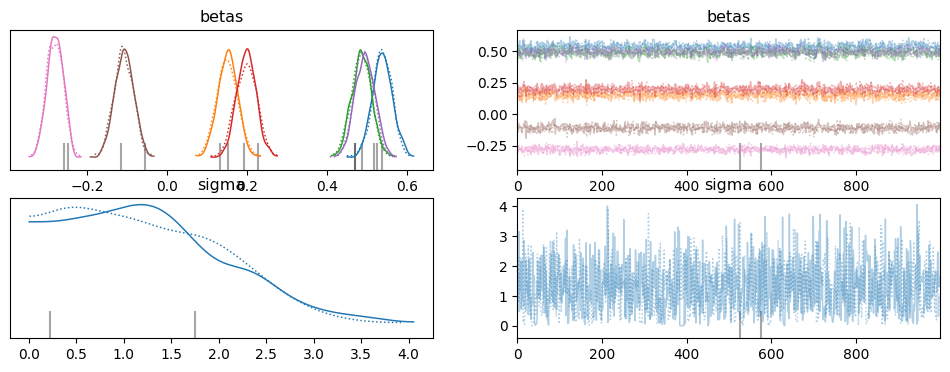

In [22]:
az.plot_trace(idata)
summary = az.summary(idata, var_names=['betas'])
summary